In [2]:
import pandas as pd
import sqlite3
import pygwalker as pyg
import matplotlib.pyplot as plt

In [3]:
mediciones = pd.read_csv("Data/DS_Mediciones_Clima.csv", sep=";")

In [4]:
conn = sqlite3.connect("Base/ciudades.db")

In [5]:
cursor = conn.cursor()

In [6]:
clima = pd.read_sql("SELECT * FROM ciudades", con=conn)

In [7]:
mediciones

,CODIGO_CIUDAD,date,temperature_2m,wind_speed_10m,wind_speed_100m,relative_humidity_2m,weather_code,rain,pressure_msl,apparent_temperature,precipitation,cloud_cover,soil_temperature_0_to_7cm,CODIGO_CIUDAD.1
0,OCC,23/4/2023 7:00,10926499,3396233,66185193,8658815,30,0,10182,10110747,0,1000,10676499,OCC
1,NLO,23/4/2023 8:00,117765,21897945,3671294,8268405,30,0,10190,11176652,0,1000,113765,NLO
2,GPS,23/4/2023 9:00,123765,50911684,7072878,77624985,510,1,10199,11260727,1,1000,124765,GPS
3,GPS,23/4/2023 10:00,128765,29024127,40249224,74112206,510,1,10199,12027731,1,1000,13426499,GPS
4,SCY,23/4/2023 11:00,130265,43349743,56233797,7388791,510,2,10195,11994795,2,1000,14176499,SCY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17899,GPS,8/5/2025 2:00,95765,15379207,34623692,8269127,20,0,10196,853143,0,540,99765,GPS
17900,GPS,8/5/2025 3:00,9176499,3438895,5920878,8494522,20,0,10196,7854185,0,770,98265,GPS
17901,GPS,8/5/2025 4:00,86265,3572898,75942082,8725382,30,0,10197,7249462,0,890,9676499,GPS
17902,ETR,8/5/2025 5:00,84765,28001428,6114703,8814405,20,0,10202,7212145,0,730,96265,ETR


In [8]:
clima

,id,CODIGO_CIUDAD,CIUDAD,REGION,ALTURA
0,1,UIO,QUITO,SIERRA,2850
1,2,CUE,CUENCA,SIERRA,2550
2,3,LOH,LOJA,SIERRA,2530
3,4,AMB,AMBATO,SIERRA,2500
4,5,TEN,PUYO,ORIENTE,950
5,6,ZAM,ZAMORA,ORIENTE,920
6,7,SCY,SAN CRISTOBAL,COSTA,730
7,8,OCC,COCA,ORIENTE,300
8,9,NLO,NUEVA LOJA,ORIENTE,297
9,10,GPS,BALTRA,COSTA,100


In [9]:
unificado = pd.merge(mediciones, clima, on='CODIGO_CIUDAD')

In [10]:
unificado

,CODIGO_CIUDAD,date,temperature_2m,wind_speed_10m,wind_speed_100m,relative_humidity_2m,weather_code,rain,pressure_msl,apparent_temperature,precipitation,cloud_cover,soil_temperature_0_to_7cm,CODIGO_CIUDAD.1,id,CIUDAD,REGION,ALTURA
0,OCC,23/4/2023 7:00,10926499,3396233,66185193,8658815,30,0,10182,10110747,0,1000,10676499,OCC,8,COCA,ORIENTE,300
1,NLO,23/4/2023 8:00,117765,21897945,3671294,8268405,30,0,10190,11176652,0,1000,113765,NLO,9,NUEVA LOJA,ORIENTE,297
2,GPS,23/4/2023 9:00,123765,50911684,7072878,77624985,510,1,10199,11260727,1,1000,124765,GPS,10,BALTRA,COSTA,100
3,GPS,23/4/2023 10:00,128765,29024127,40249224,74112206,510,1,10199,12027731,1,1000,13426499,GPS,10,BALTRA,COSTA,100
4,SCY,23/4/2023 11:00,130265,43349743,56233797,7388791,510,2,10195,11994795,2,1000,14176499,SCY,7,SAN CRISTOBAL,COSTA,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17899,GPS,8/5/2025 2:00,95765,15379207,34623692,8269127,20,0,10196,853143,0,540,99765,GPS,10,BALTRA,COSTA,100
17900,GPS,8/5/2025 3:00,9176499,3438895,5920878,8494522,20,0,10196,7854185,0,770,98265,GPS,10,BALTRA,COSTA,100
17901,GPS,8/5/2025 4:00,86265,3572898,75942082,8725382,30,0,10197,7249462,0,890,9676499,GPS,10,BALTRA,COSTA,100
17902,ETR,8/5/2025 5:00,84765,28001428,6114703,8814405,20,0,10202,7212145,0,730,96265,ETR,11,SANTA ROSA,COSTA,10


In [11]:
pyg.walk(unificado)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006358827a0d37f5iC1wdSDzRl60JVn" style="height: auto">\n    <hea…

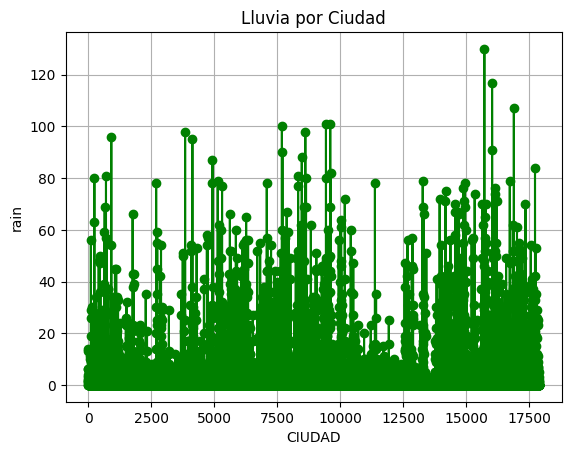

In [12]:
plt.plot(unificado['rain'], marker='o', linestyle='-', color='green')
plt.title('Lluvia por Ciudad')
plt.xlabel('CIUDAD')
plt.ylabel('rain')
plt.grid(True)
plt.show()

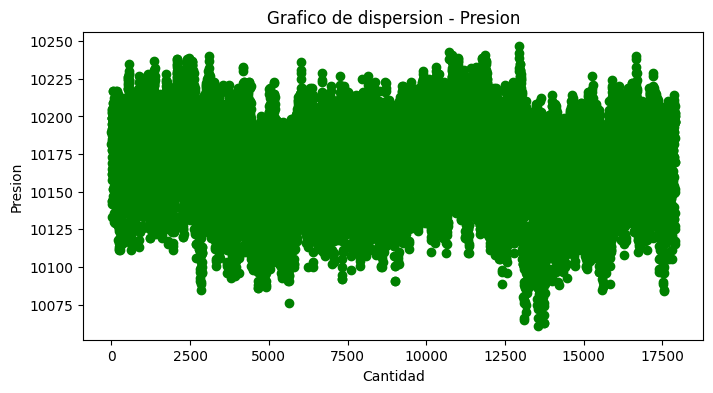

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(unificado.index, unificado['pressure_msl'], color='green')
plt.title('Grafico de dispersion - Presion')
plt.xlabel('Cantidad')
plt.ylabel('Presion')
plt.show()

<Axes: ylabel='precipitation'>

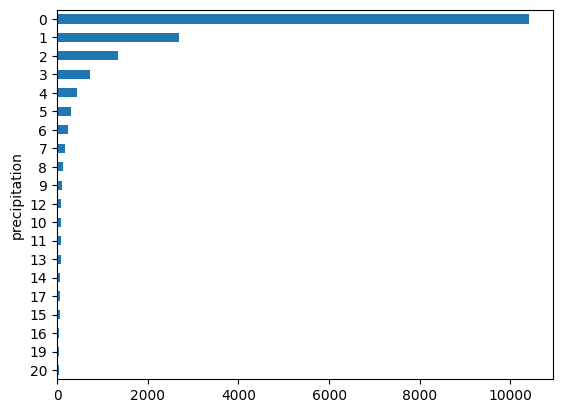

In [14]:
unificado.precipitation.value_counts()[:20].sort_values(inplace=False).plot(kind='barh')

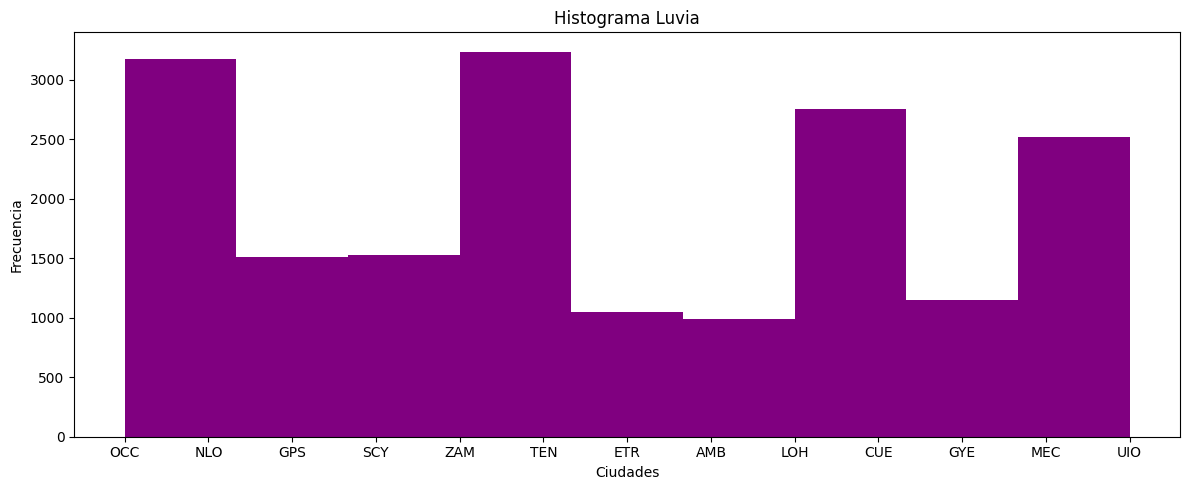

In [103]:
plt.figure(figsize=(12,5))
plt.hist(unificado['CODIGO_CIUDAD'], bins=9, color='purple')
plt.title('Histograma Luvia')
plt.xlabel('Ciudades')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

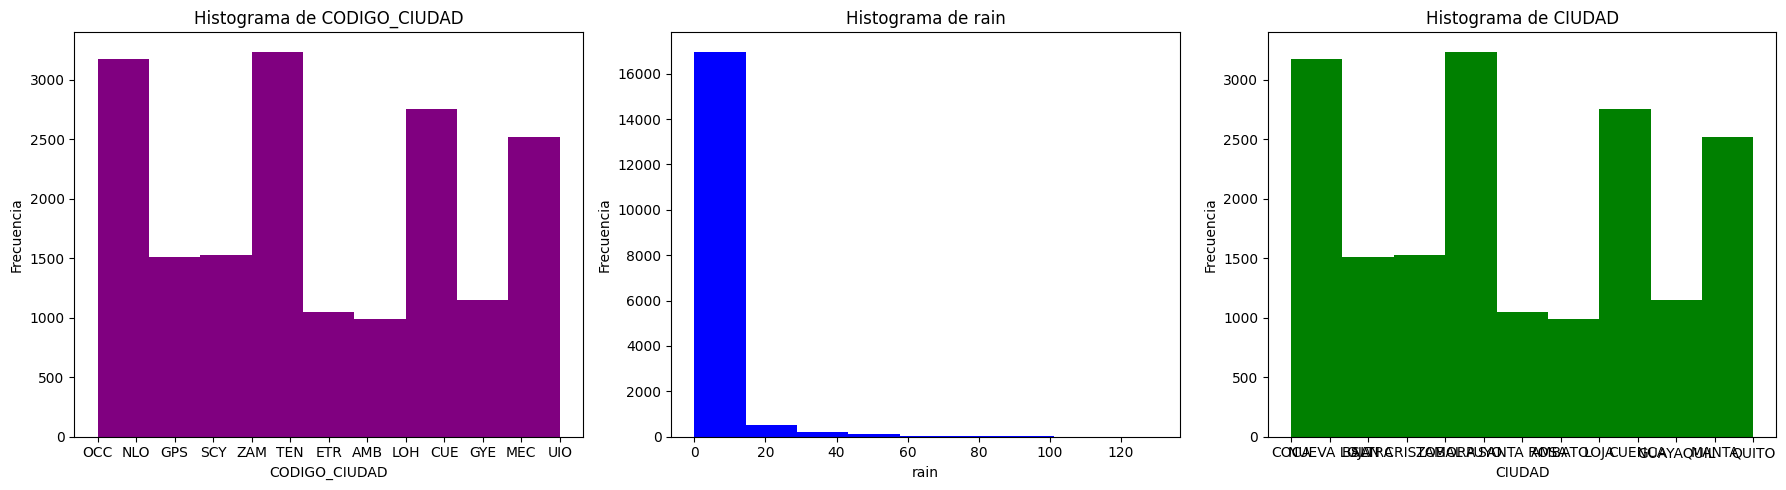

In [101]:
plt.figure(figsize=(18, 5))

columnas = ['CODIGO_CIUDAD', 'rain', 'CIUDAD']

for i, columna in enumerate(columnas, 1):
    plt.subplot(1, len(columnas), i)
    plt.hist(unificado[columna], bins=9, color=['purple', 'blue', 'green'][i-1])
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

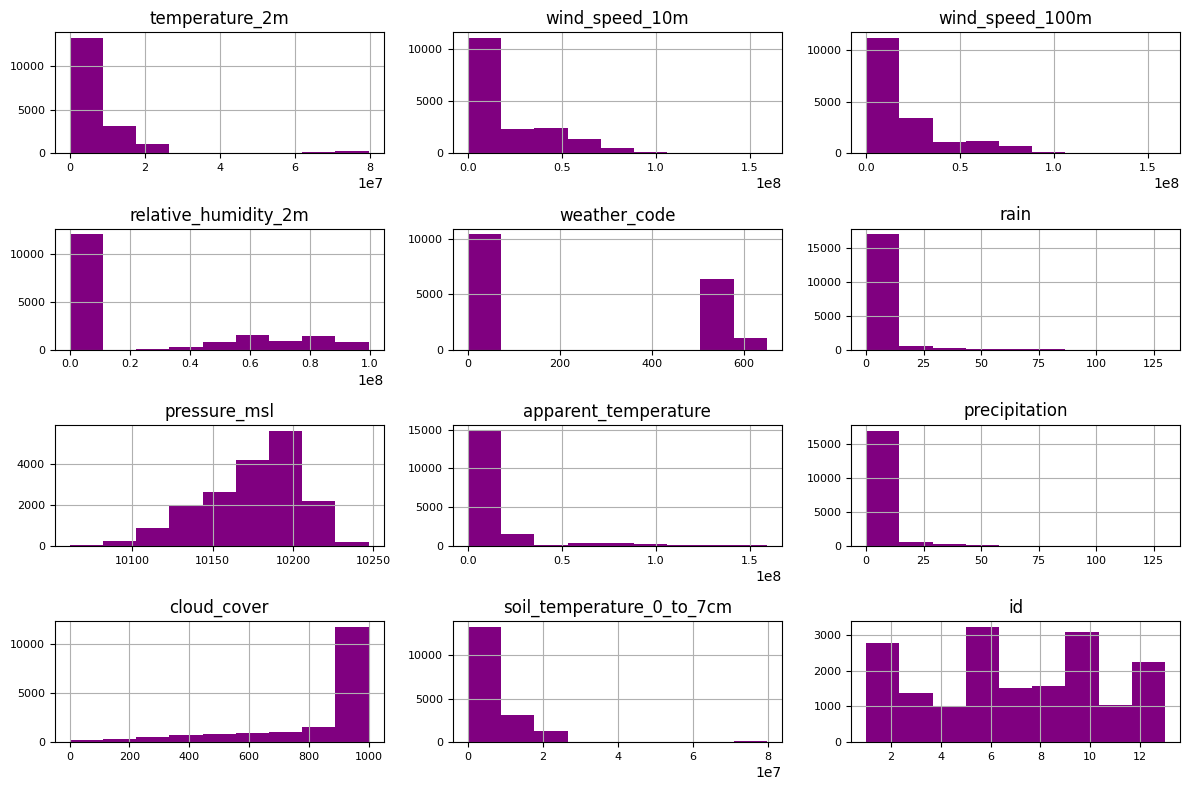

In [102]:
unificado.select_dtypes(include=['number']).hist(
    bins=9,
    figsize=(12, 8),
    color='purple',
    xlabelsize=8,
    ylabelsize=8
)
plt.tight_layout()
plt.show()

In [96]:
from bokeh.transform import factor_cmap

In [97]:
source = ColumnDataSource(unificado)

In [98]:
p = figure(title="Lluvia vs Ciudad por Región",
           x_axis_label='CIUDAD',
           y_axis_label='rain')

In [99]:
p.scatter(x='CIUDAD', y='rain', source=source, size=12,
          color=factor_cmap('REGION', palette=['red', 'green', 'blue', 'orange'], 
                           factors=unificado['REGION'].unique()))

show(p)